In [1]:
import sys
sys.path.append("../")

In [7]:
from utils.text_splitter import TextSplitter
from utils.chroma_store import ChromaStore
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
nhs_data = pd.read_csv('../data/nhs_data_validated.csv')
mind_data = pd.read_csv('../data/mind_data_validated.csv')

print(f"Length of NHS dataset: {len(nhs_data)}")
print(f"Length of Mind dataset: {len(mind_data)}")

In [ ]:
### Parameters
model_name = "hkunlp/instructor-base"
DEFAULT_EMBED_INSTRUCTION = "Represent the document for retrieval: "
DEFAULT_QUERY_INSTRUCTION = (
    "Represent the question for retrieving supporting documents: "
)
ef_query = embedding_functions.InstructorEmbeddingFunction(model_name=model_name, instruction=DEFAULT_QUERY_INSTRUCTION)
chroma_client = ChromaStore(chroma_server_hostname="localhost", chroma_server_port=8000)
N_RESULTS = 4


In [19]:
def add_chroma(use_embed_instruction: bool = False):
    if use_embed_instruction:
        ef_embed = embedding_functions.InstructorEmbeddingFunction(model_name=model_name, instruction=DEFAULT_EMBED_INSTRUCTION)
    else:
         ef_embed = embedding_functions.InstructorEmbeddingFunction(model_name=model_name, instruction=None)

    chroma_client.add_texts(
        collection_name=collection_name,
        texts=texts,
        ids=uuids,
        metadatas=[{"source": url, "data_version": data_version} for url in src_urls],
        embedding_function=ef_embed,
    )

def query_chroma(query_text: str, use_query_instruction: bool = False):
    if use_query_instruction:
        ef_query = embedding_functions.InstructorEmbeddingFunction(model_name=model_name, instruction=DEFAULT_EMBED_INSTRUCTION)
    else:
        ef_query = embedding_functions.InstructorEmbeddingFunction(model_name=model_name, instruction=None)

    result_dict = chroma_client.query_collection(
        collection_name=collection_name,
        query_texts=query_text,
        n_results=N_RESULTS,
        embedding_function=ef_query,
    )
    documents = " ".join(result_dict["documents"][0])


def get_llm_prompt(query_text: str, enable_chunking: bool = False, is_new_experiment: bool = False):
    pass

## Distribution for lengths

### NHS dataset

Average length of text in NHS dataset is 3751 words. Considering all texts are of the same length, we add these texts in vector store and get 4 nearest neighbours for query question. This puts length of context = 15004 words (3751 x 4).

Text(0.5, 0.98, 'Histogram for length distribution NHS data')

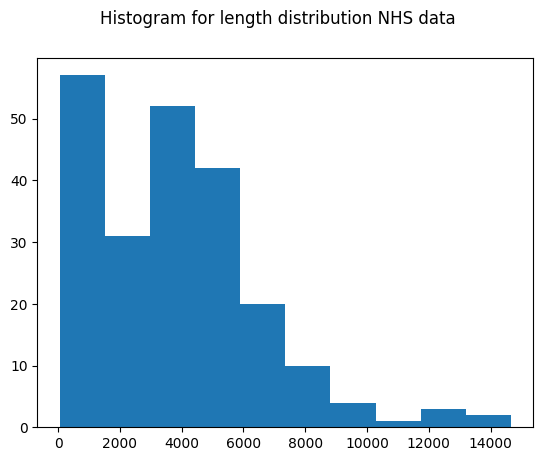

In [11]:
nhs_data['text_scraped'].apply(len).hist(grid=False)
plt.suptitle("Histogram for length distribution NHS data")

In [16]:
nhs_data['text_scraped'].str.len().describe()

count      222.000000
mean      3751.572072
std       2843.689290
min         57.000000
25%       1454.250000
50%       3572.500000
75%       5277.500000
max      14656.000000
Name: text_scraped, dtype: float64

### Mind dataset

Average length of text in Mind dataset is 4965 words. Considering all texts are of the same length, we add these texts in vector store and get 4 nearest neighbours for query question. This puts length of context = 19860 words (4965 x 4).

Text(0.5, 0.98, 'Histogram for length distribution Mind data')

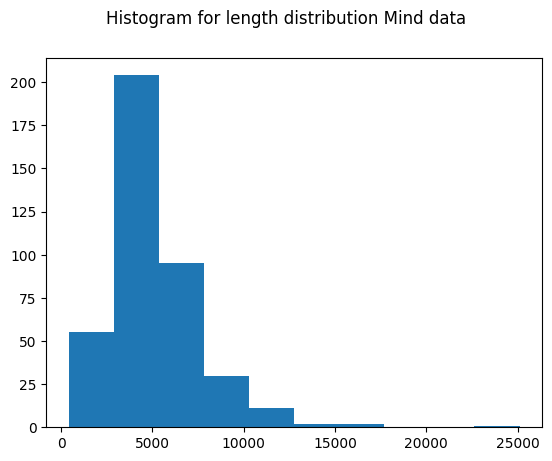

In [12]:
mind_data['text_scraped'].apply(len).hist(grid=False)
plt.suptitle("Histogram for length distribution Mind data")

In [17]:
mind_data['text_scraped'].str.len().describe()

count      400.000000
mean      4965.332500
std       2633.483565
min        415.000000
25%       3190.250000
50%       4307.000000
75%       6111.000000
max      25110.000000
Name: text_scraped, dtype: float64